In [9]:
"""
#  SSS  K   K        SSS  H   H IIIII EEEEE L     DDDD  EEEEE RRRR   SSS        4   4 TTTTT H   H       RRRR   OOO   OOO  K   K IIIII EEEEE  SSS  
# S     K  K        S     H   H   I   E     L     D   D E     R   R S           4   4   T   H   H       R   R O   O O   O K  K    I   E     S     
#  SSS  KKK          SSS  HHHHH   I   EEEEE L     D   D EEEEE RRRR   SSS        44444   T   HHHHH       RRRR  O   O O   O KKK     I   EEEEE  SSS  
#     S K  K            S H   H   I   E     L     D   D E     R  R      S           4   T   H   H       R  R  O   O O   O K  K    I   E         S 
# SSSS  K   K       SSSS  H   H IIIII EEEEE LLLLL DDDD  EEEEE R   R SSSS            4   T   H   H       R   R  OOO   OOO  K   K IIIII EEEEE SSSS  

1차 팀 프로젝트 6조 HelloHome 

repository master   :   박시훈(cooperear)

file_name           :   final_test.ipynb

"""


'\n#  SSS  K   K        SSS  H   H IIIII EEEEE L     DDDD  EEEEE RRRR   SSS        4   4 TTTTT H   H       RRRR   OOO   OOO  K   K IIIII EEEEE  SSS  \n# S     K  K        S     H   H   I   E     L     D   D E     R   R S           4   4   T   H   H       R   R O   O O   O K  K    I   E     S     \n#  SSS  KKK          SSS  HHHHH   I   EEEEE L     D   D EEEEE RRRR   SSS        44444   T   HHHHH       RRRR  O   O O   O KKK     I   EEEEE  SSS  \n#     S K  K            S H   H   I   E     L     D   D E     R  R      S           4   T   H   H       R  R  O   O O   O K  K    I   E         S \n# SSSS  K   K       SSSS  H   H IIIII EEEEE LLLLL DDDD  EEEEE R   R SSSS            4   T   H   H       R   R  OOO   OOO  K   K IIIII EEEEE SSSS  \n\n1차 팀 프로젝트 6조 HelloHome \n\nrepository master   :   박시훈(cooperear)\n\nfile_name           :   final_test.ipynb\n\n'

In [15]:
#jupyter 전용
import os
os.getcwd()
import sys
sys.path.append('1_team_project_with_using_api_and_df\HelloHome\AbandonedAnimals.py')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
from AbandonedAnimals import AbandonedAnimals


In [28]:
a = AbandonedAnimals()
df =  a.fetch_abandoned_animals() #전체데이터
# df = a.fetch_abandoned_animals(20250601,20250730) #기간 상관있게,str 처리되게 함 날짜 포멧팅:YYYYMMDD
#df = a.fetch_abandoned_animals('20250730','20250730') #기간 상관있게, str 써도 됨



https://apis.data.go.kr/1543061/abandonmentPublicService_v2/abandonmentPublic_v2?serviceKey=jWovxlcK3oev1Weeu%2FaHCUNUMIkk%2FCnZbPnX%2BQn1dcMCl9d%2BpeGX3Dh90VhNCM59BHDljQckSEiDij1B7k0U5w%3D%3D&pageNo=1&numOfRows=1000
요청 중: page 1
https://apis.data.go.kr/1543061/abandonmentPublicService_v2/abandonmentPublic_v2?serviceKey=jWovxlcK3oev1Weeu%2FaHCUNUMIkk%2FCnZbPnX%2BQn1dcMCl9d%2BpeGX3Dh90VhNCM59BHDljQckSEiDij1B7k0U5w%3D%3D&pageNo=2&numOfRows=1000
요청 중: page 2
https://apis.data.go.kr/1543061/abandonmentPublicService_v2/abandonmentPublic_v2?serviceKey=jWovxlcK3oev1Weeu%2FaHCUNUMIkk%2FCnZbPnX%2BQn1dcMCl9d%2BpeGX3Dh90VhNCM59BHDljQckSEiDij1B7k0U5w%3D%3D&pageNo=3&numOfRows=1000
요청 중: page 3
https://apis.data.go.kr/1543061/abandonmentPublicService_v2/abandonmentPublic_v2?serviceKey=jWovxlcK3oev1Weeu%2FaHCUNUMIkk%2FCnZbPnX%2BQn1dcMCl9d%2BpeGX3Dh90VhNCM59BHDljQckSEiDij1B7k0U5w%3D%3D&pageNo=4&numOfRows=1000
요청 중: page 4
https://apis.data.go.kr/1543061/abandonmentPublicService_v2/abandonmentPublic_v2

In [29]:
#df의 값은 pandas.DataFrame
print(f'{type(df)}')

<class 'pandas.core.frame.DataFrame'>


In [30]:
#df의 값은 pandas.DataFrame
print(f'{type(df)}')

<class 'pandas.core.frame.DataFrame'>


In [31]:
# 원본 dataframe을 불러올 수도 있음(trouble shooting: Original_Data_Backup개념)
original_df= a.dataframe.copy()
print(f'{type(df)}')

<class 'pandas.core.frame.DataFrame'>


Malgun Gothic


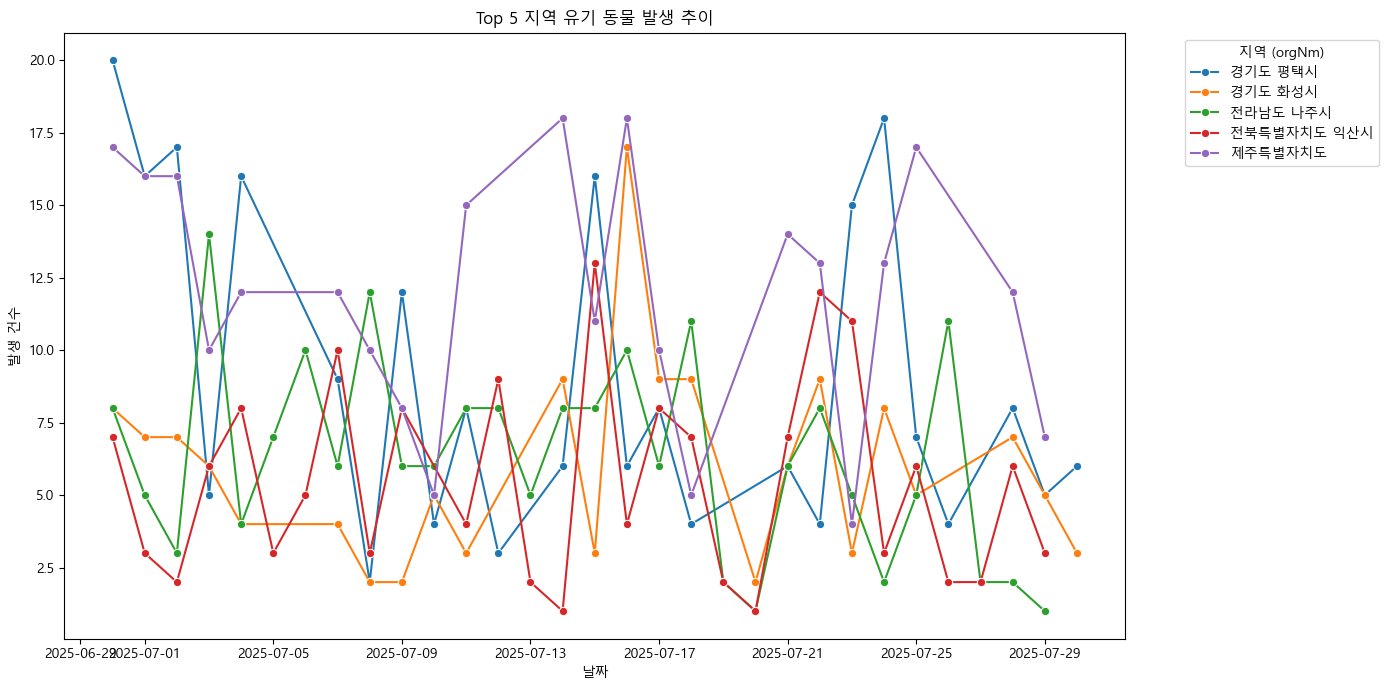

In [ ]:



font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
matplotlib.rc('font', family=font_prop)
# 날짜 변환
df['happenDt'] = pd.to_datetime(df['happenDt'], format='%Y%m%d')

# orgNm 상위 5개 추출
top5_orgs = df['orgNm'].value_counts().nlargest(5).index
df_top = df[df['orgNm'].isin(top5_orgs)]

# 날짜별 + 지역별 count 집계
grouped = (
    df_top.groupby([df_top['happenDt'].dt.to_period('D'), 'orgNm'])
    .size()
    .reset_index(name='count')
)
grouped['happenDt'] = grouped['happenDt'].dt.to_timestamp()

# 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped, x='happenDt', y='count', hue='orgNm', marker='o')
plt.title('Top 5 지역 유기 동물 발생 추이')
plt.xlabel('날짜')
plt.ylabel('발생 건수')
plt.legend(title='지역 (orgNm)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
df[['upKindNm','kindNm','popfile1','colorCd','age','sexCd','neuterYn','careRegNo','weight','careTel','careAddr']]
#df



,upKindNm,kindNm,popfile1,colorCd,age,sexCd,neuterYn,careRegNo,weight,careTel,careAddr
0,개,푸들,http://openapi.animal.go.kr/openapi/service/re...,갈색,2020(년생),F,N,369569202000001,3.75(Kg),010-4435-3720,세종특별자치시 전동면 미륵당1길 188 (전동면)
1,개,믹스견,http://openapi.animal.go.kr/openapi/service/re...,적갈&검정&흰색,2021(년생),F,N,348527200900001,4.5(Kg),055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터
2,개,믹스견,http://openapi.animal.go.kr/openapi/service/re...,검정&흰색,2025(60일미만)(년생),F,N,348527200900001,0.1(Kg),055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터
3,개,믹스견,http://openapi.animal.go.kr/openapi/service/re...,갈색&흰색,2025(60일미만)(년생),M,N,348527200900001,0.1(Kg),055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터
4,개,믹스견,http://openapi.animal.go.kr/openapi/service/re...,검정&흰색,2025(60일미만)(년생),M,N,348527200900001,0.1(Kg),055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터
...,...,...,...,...,...,...,...,...,...,...,...
8766,고양이,한국 고양이,http://openapi.animal.go.kr/openapi/service/re...,검은색흰색황토색조합,2025(60일미만)(년생),F,N,311303202500004,0.2(Kg),02-2297-0075,서울특별시 성동구 왕십리로 381 (하왕십리동)
8767,고양이,한국 고양이,http://openapi.animal.go.kr/openapi/service/re...,레몬색&흰색,2025(60일미만)(년생),Q,U,342421201000001,0.5(Kg),033-522-2990,"강원도 동해시 대동로 159-13 (송정동, 동해시유기동물보호소)"
8768,고양이,한국 고양이,http://openapi.animal.go.kr/openapi/service/re...,레몬색&흰색,2025(60일미만)(년생),Q,N,341553201700001,1(Kg),031-356-2281,경기도 화성시 남양읍 화성로 1483-27 (남양읍)
8769,고양이,한국 고양이,http://openapi.animal.go.kr/openapi/service/re...,흰색/검은색 얼룩무늬,2025(60일미만)(년생),F,N,329359201300001,0.43(Kg),062-613-6770,광주광역시 북구 본촌마을길 25-1 (본촌동) 광주동물보호센터


In [46]:
df.columns

Index(['desertionNo', 'happenDt', 'happenPlace', 'kindFullNm', 'upKindCd',
       'upKindNm', 'kindCd', 'kindNm', 'colorCd', 'age', 'weight', 'noticeNo',
       'noticeSdt', 'noticeEdt', 'popfile1', 'processState', 'sexCd',
       'neuterYn', 'careRegNo', 'careNm', 'careTel', 'careAddr', 'careOwnerNm',
       'orgNm', 'updTm'],
      dtype='object')

In [47]:
df

,desertionNo,happenDt,happenPlace,kindFullNm,upKindCd,upKindNm,kindCd,kindNm,colorCd,age,...,processState,sexCd,neuterYn,careRegNo,careNm,careTel,careAddr,careOwnerNm,orgNm,updTm
0,469569202500539,2025-07-30,세종시 전의면 김처선로 100,[개] 푸들,417000,개,000128,푸들,갈색,2020(년생),...,보호중,F,N,369569202000001,세종유기동물보호센터,010-4435-3720,세종특별자치시 전동면 미륵당1길 188 (전동면),김성구,세종특별자치시,2025-07-30 22:19:47.0
1,448567202501150,2025-07-30,의창구 북면 월계리 85-1,[개] 믹스견,417000,개,000114,믹스견,적갈&검정&흰색,2021(년생),...,보호중,F,N,348527200900001,창원동물보호센터,055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터,창원시장,경상남도 창원시 의창성산구,2025-07-30 16:36:52.0
2,448567202501149,2025-07-30,의창구 북면 신촌리 592-2,[개] 믹스견,417000,개,000114,믹스견,검정&흰색,2025(60일미만)(년생),...,보호중,F,N,348527200900001,창원동물보호센터,055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터,창원시장,경상남도 창원시 의창성산구,2025-07-30 11:24:45.0
3,448567202501148,2025-07-30,의창구 북면 신촌리 592-2,[개] 믹스견,417000,개,000114,믹스견,갈색&흰색,2025(60일미만)(년생),...,보호중,M,N,348527200900001,창원동물보호센터,055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터,창원시장,경상남도 창원시 의창성산구,2025-07-30 11:25:06.0
4,448567202501147,2025-07-30,의창구 북면 신촌리 592-2,[개] 믹스견,417000,개,000114,믹스견,검정&흰색,2025(60일미만)(년생),...,보호중,M,N,348527200900001,창원동물보호센터,055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터,창원시장,경상남도 창원시 의창성산구,2025-07-30 11:25:27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8766,411303202500353,2025-06-30,광나루로11길 12-1,[고양이] 한국 고양이,422400,고양이,000200,한국 고양이,검은색흰색황토색조합,2025(60일미만)(년생),...,보호중,F,N,311303202500004,조은동물병원,02-2297-0075,서울특별시 성동구 왕십리로 381 (하왕십리동),강천근,서울특별시 성동구,2025-06-30 17:59:10.0
8767,442421202500144,2025-06-30,무릉계곡 주변,[고양이] 한국 고양이,422400,고양이,000200,한국 고양이,레몬색&흰색,2025(60일미만)(년생),...,보호중,Q,U,342421201000001,동해시동물보호센터,033-522-2990,"강원도 동해시 대동로 159-13 (송정동, 동해시유기동물보호소)",동해시농업기술센터,강원특별자치도 동해시,2025-06-30 17:31:50.0
8768,441553202502318,2025-06-30,우정읍 주곡리 인근,[고양이] 한국 고양이,422400,고양이,000200,한국 고양이,레몬색&흰색,2025(60일미만)(년생),...,종료(자연사),Q,N,341553201700001,화성동물보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27 (남양읍),심은용 외 1인,경기도 화성시,2025-07-05 11:41:22.0
8769,429359202500307,2025-06-30,동구 무등로 497-3,[고양이] 한국 고양이,422400,고양이,000200,한국 고양이,흰색/검은색 얼룩무늬,2025(60일미만)(년생),...,종료(자연사),F,N,329359201300001,광주동물보호센터,062-613-6770,광주광역시 북구 본촌마을길 25-1 (본촌동) 광주동물보호센터,광주광역시장,광주광역시 동구,2025-07-02 10:35:58.0
